# Popular Data Science Questions (Based on Data Science Stack Exchange)

Aim of this project is to use [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange

#### What kind of questions are welcome on this site?
On DSSE's help center's section on questions , we can read that we should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to the goal of this project.

In addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

- Open Data (Dataset requests)
- Computational Science (Software packages and algorithms in applied mathematics)

#### What, other than questions, does DSSE's home subdivide into?
On the home page we can see that we have four sections:

- Questions — a list of all questions asked;
- Tags — a list of tags (keywords or labels that categorize questions);



![title](tags.png)

- Users — a list of users;
- Unanswered — a list of unanswered questions;
The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

#### What information is available in each post?
Looking, just as an example, at this question, some of the information we see is:

For both questions and answers:
- The posts's score;
- The posts's title;
- The posts's author;
- The posts's body;
- For questions only:
- How many users have it on their "
- The last time the question as active;
- How many times the question was viewed;
- Related questions;
- The question's tags;

## Stack Exchange Data Exploration

Perusing the table names using Query Data Science, a few stand out as relevant for our goal:

- Posts
- PostTags
- Tags
- TagSynonyms

Running a few exploratory queries, leads us to focus our efforts on Posts table. For examples, the Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

![title](table.png)

## Getting the Data

After running relevant query in Query Data Science we receive a following Posts table:

![title](posts.png)

Where:
- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).

## Data Exploration

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
questions = pd.read_csv('2019_questions.csv')

In [3]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


As we can see above only Favorite Count has a missing values. We can assume that missing value on this column probably means that the question is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats. 

Let's explore Tags column:

In [5]:
questions['Tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

The Tags columns is a string. On Stack Exchange, each question can only have a maximum of five tags. But for the purpose of this analysis we will keep them as a list but we will transform strings inside to be more readable.

## Cleaning Data

In [6]:
questions.fillna(0,inplace = True)

In [7]:
questions.isnull().sum()

Id               0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64

In [8]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [9]:
import datetime as dt

In [10]:
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

In [11]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [12]:
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)

In [13]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [22]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split('><')

In [23]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


## Most Used and Most Viewed

In [42]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [43]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
object-detection,109
java,14
probability,76
model-selection,58
nosql,3
doc2vec,3
google,17
least-squares-svm,1
policy-gradients,27
clusters,10


In [45]:
tag_count.sort_values(by = ["Count"],ascending=False)

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [52]:
most_used = tag_count.sort_values(by = ["Count"],ascending=False).head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


The threshold of 20 is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

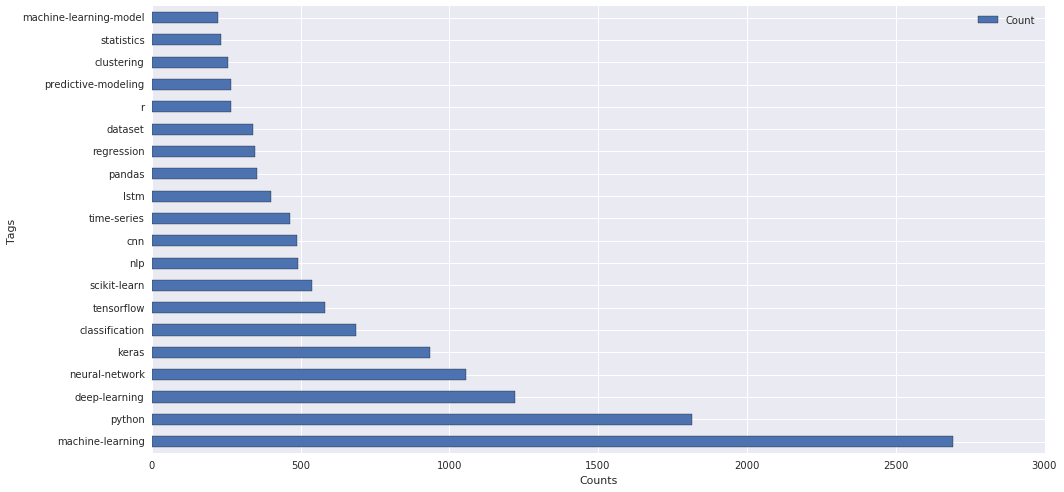

In [53]:
most_used.plot(kind = 'barh', figsize = (16,8))
plt.xlabel('Counts')
plt.ylabel('Tags')

Some tags are very, very broad and are unlikely to be useful; e.g.: python, dataset, r. Before we investigate the tags a little deeper, let's repeat the same process for views.

In [54]:
tag_view_count =dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient = 'index')
tag_view_count.rename(columns={0:'ViewCount'}, inplace = True)

most_viewed = tag_view_count.sort_values(by = 'ViewCount', ascending = False,).head(20)
most_viewed

,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


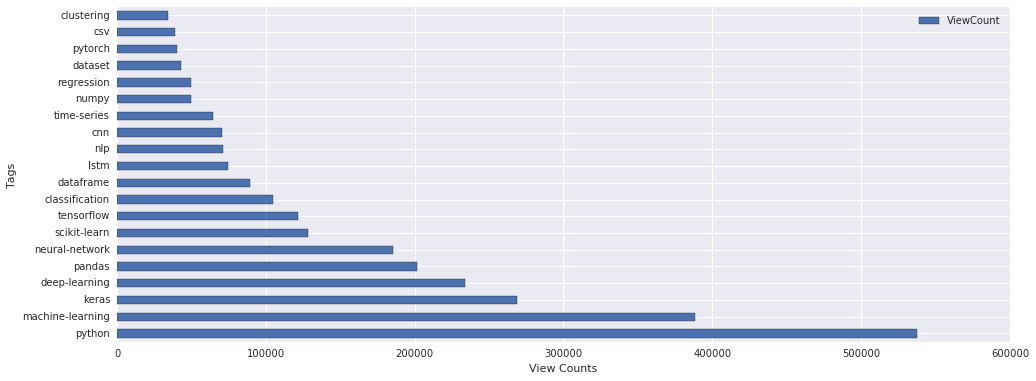

In [58]:
most_viewed.plot(kind = 'barh', figsize = (16,6))
plt.xlabel('View Counts')
plt.ylabel('Tags')

Let's compare two graphs.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f367e5e18d0>],
      dtype=object)

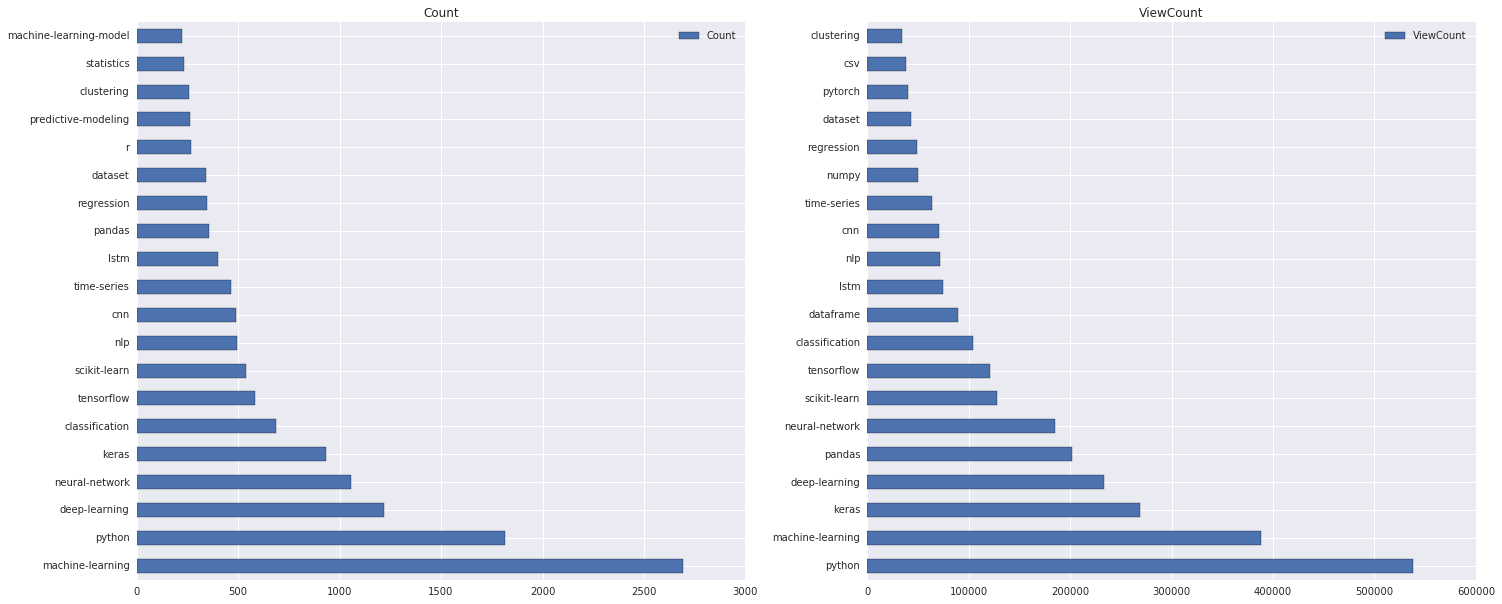

In [59]:
fig, axes = plt.subplots(nrows=1, ncols =2)
fig.set_size_inches((24,10))
most_used.plot(kind='barh', ax= axes[0], subplots = True)
most_viewed.plot(kind = 'barh', ax = axes[1], subplots = True)

From graphs above we can see that most tags are present in both dataframes. Let's try to merge two dataframes to see what tags are in most_used but not in most_viewed and other way around. 

In [60]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)

In [61]:
in_used

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [63]:
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

In [64]:
in_viewed

,Count,ViewCount
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


The tags present in most_used and not present in most_viewed are:

- machine-learning-model
- statistics
- predictive-modeling
- r

And the tags present in most_viewed but not in most_used are:

- csv
- pytorch
- dataframe

Some tags also stand out as being related. For example, python is related to pandas, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

## Relations between Tags

To check how pair of tags are related to each other is to count how many times each pairs appear together. To do this we have to create a list of tags and dataframe wehre each row will represent a tag and each column as well. 

In [65]:
all_tags = list(tag_count.index)

In [66]:
all_tags

['object-detection',
 'java',
 'probability',
 'model-selection',
 'nosql',
 'doc2vec',
 'google',
 'least-squares-svm',
 'policy-gradients',
 'clusters',
 'pipelines',
 'rbf',
 'networkx',
 'pac-learning',
 'excel',
 'vgg16',
 'groupby',
 'ngrams',
 'lda',
 'recommender-system',
 'relational-dbms',
 'data',
 'kaggle',
 'azure-ml',
 'similar-documents',
 'image-classification',
 'numerical',
 'mnist',
 'scikit-learn',
 'python-3.x',
 'training',
 'dataframe',
 'imbalanced-learn',
 'learning',
 'pathfinder',
 'dataset',
 'orange3',
 'manifold',
 'tsne',
 'gensim',
 'automl',
 'meta-learning',
 'etl',
 'lasso',
 'pickle',
 'graphical-model',
 'word',
 'math',
 'dimensionality-reduction',
 'haar-cascade',
 'image-preprocessing',
 'matrix-factorisation',
 'dynamic-programming',
 'rdkit',
 'data-science-model',
 'non-parametric',
 'mcmc',
 'mongodb',
 'weighted-data',
 'faster-rcnn',
 'machine-learning',
 'label-flipping',
 'audio-recognition',
 'openai-gym',
 'cloud-computing',
 'bigdata',

In [67]:
associations = pd.DataFrame(index =all_tags, columns = all_tags)
associations.head()

,object-detection,java,probability,model-selection,nosql,doc2vec,google,least-squares-svm,policy-gradients,clusters,...,statsmodels,data-imputation,ibm-watson,convergence,text-mining,attention-mechanism,learning-rate,finetuning,error-handling,sql
object-detection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
probability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model-selection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nosql,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, we will fill the data frame with zeros and for each lists of tags in questions['Tags'], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [68]:
associations.fillna(0, inplace = True)

for tags in questions['Tags']:
    associations.loc[tags,tags] += 1

In [69]:
associations.head()

,object-detection,java,probability,model-selection,nosql,doc2vec,google,least-squares-svm,policy-gradients,clusters,...,statsmodels,data-imputation,ibm-watson,convergence,text-mining,attention-mechanism,learning-rate,finetuning,error-handling,sql
object-detection,109,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
java,0,14,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
probability,0,0,76,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
model-selection,0,0,2,58,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
nosql,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [71]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

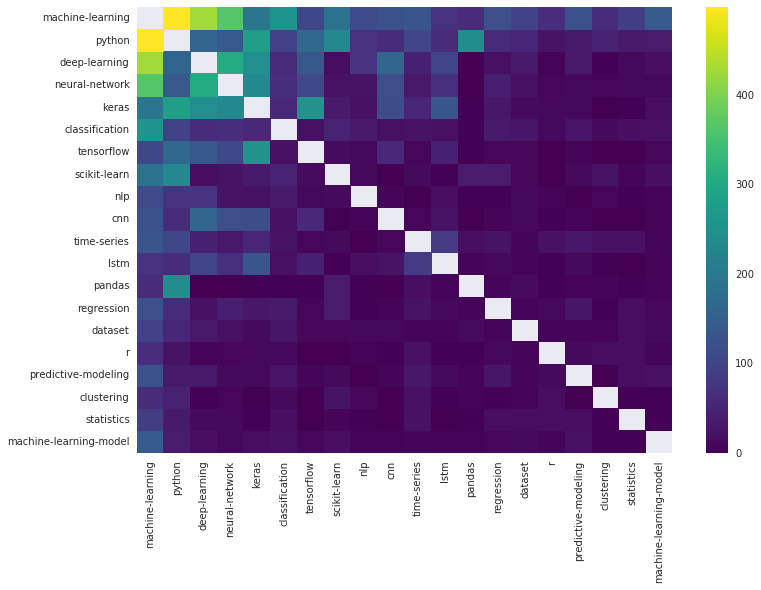

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="viridis", annot=False)

The most used tags also seem to have the strongest relationships, as given by the yellow concentration in the top left corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

Let's investigate deep learning further. Using additional query in Query Data Science and tech all of the questions ever asked on DSSE, their dates and tags. Thanks to this data we can track the intrest in deep learning across time. 

In [74]:
all_q = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])

In [75]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [76]:
#Using the same techinque as before we can clean Tag columns

all_q['Tags'] = all_q['Tags'].str.replace("^<|>$", "").str.split('><')

In [77]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning.

Next we can create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [78]:
dl_list = ["lstm", "cnn", "scikit-learn", "tensorflow", 
           "keras", "neural-network", "deep-learning"]

def class_deep_learning(tags):
    
    for tag in tags:
        if tag in dl_list:
            return 1
    return 0

In [79]:
all_q['DeepLearning'] = all_q['Tags'].apply(class_deep_learning)

In [80]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0


Because data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking we can track it quarterly.

In [83]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [84]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [85]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


For the final stretch of this screen, we'll group by quarter and:

- Count the number of deep learning questions.
- Count the total number of questions.
- Compute the ratio between the two numbers above.

In [86]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]

quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
1,14Q3,13,189,0.068783
21,19Q3,941,2394,0.393066
3,15Q1,18,190,0.094737
16,18Q2,566,1448,0.390884
20,19Q2,935,2393,0.390723


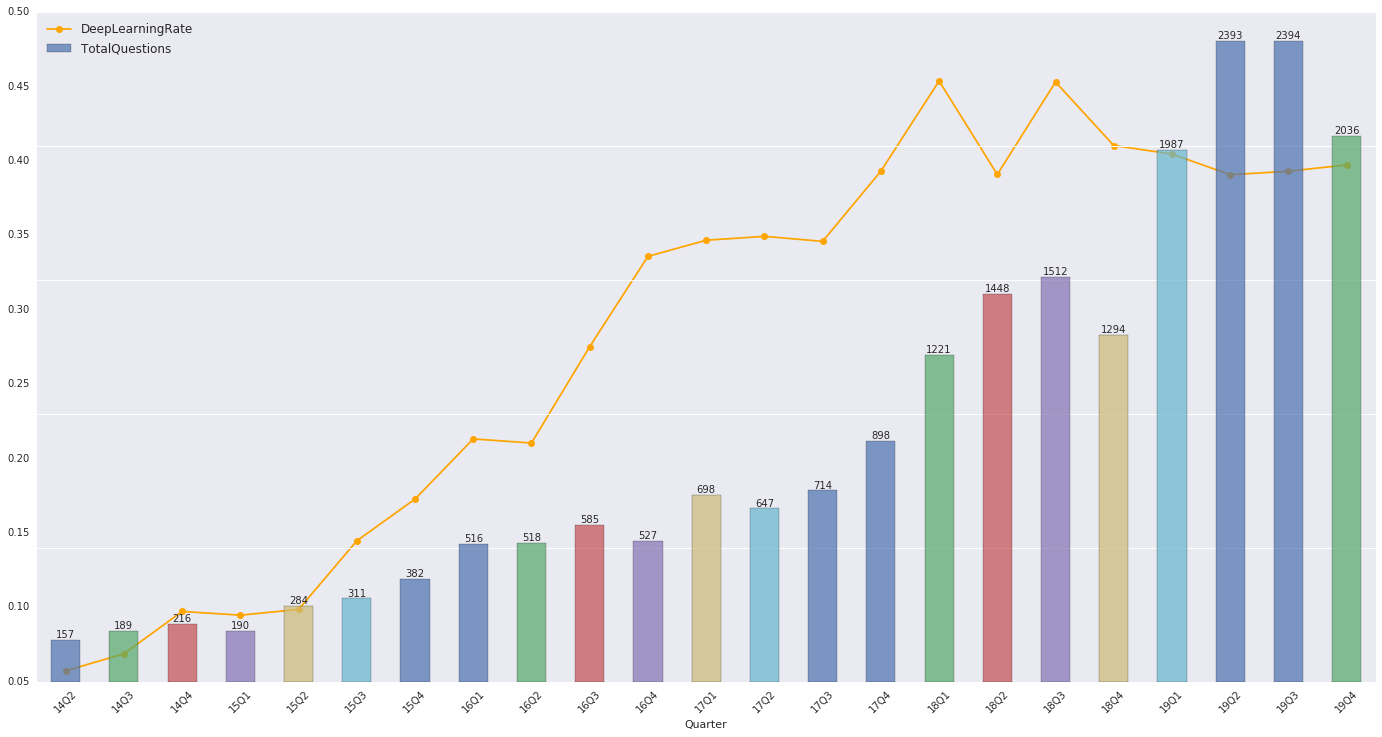

In [88]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.